<a href="https://www.kaggle.com/code/dimitar0dimov/usa-re-kn-regression-94-5?scriptVersionId=102584099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/usa-real-estate-dataset/realtor-data.csv


In [38]:
data = pd.read_csv("/kaggle/input/usa-real-estate-dataset/realtor-data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813159 entries, 0 to 813158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        813159 non-null  object 
 1   price         813088 non-null  float64
 2   bed           690360 non-null  float64
 3   bath          700599 non-null  float64
 4   acre_lot      600242 non-null  float64
 5   full_address  813159 non-null  object 
 6   street        811536 non-null  object 
 7   city          813087 non-null  object 
 8   state         813159 non-null  object 
 9   zip_code      812955 non-null  float64
 10  house_size    561288 non-null  float64
 11  sold_date     393392 non-null  object 
dtypes: float64(6), object(6)
memory usage: 74.4+ MB


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [39]:
data = data.drop(["status", "full_address", "street", "sold_date"], axis=1)

In [40]:
data = data.dropna(subset=["house_size"], how="any")

In [41]:
data = data.dropna(subset = ["bed"], how ="any")
data.isnull().sum()

price             71
bed                0
bath            4560
acre_lot      149154
city              21
state              0
zip_code          83
house_size         0
dtype: int64

In [42]:
data = data.dropna()

In [43]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
data["cityEnc"] = LB.fit_transform(data["city"])
data["stateEnc"] = LB.fit_transform(data["state"])
data = data.drop(["state","city","zip_code"],axis=1)

In [44]:
data.describe()

,price,bed,bath,acre_lot,house_size,cityEnc,stateEnc
count,3.946810e+05,394681.000000,394681.000000,394681.000000,3.946810e+05,394681.000000,394681.000000
mean,7.439953e+05,3.796094,2.681406,9.889070,2.395388e+03,1114.071002,4.167229
std,1.385816e+06,2.173904,2.256193,654.816418,3.302300e+03,660.049602,2.867928
min,5.000000e+02,1.000000,1.000000,0.000000,1.220000e+02,0.000000,0.000000
25%,2.750000e+05,3.000000,2.000000,0.120000,1.332000e+03,513.000000,3.000000
50%,4.399000e+05,3.000000,2.000000,0.280000,1.890000e+03,1151.000000,4.000000
75%,7.499000e+05,4.000000,3.000000,0.920000,2.774000e+03,1679.000000,6.000000
max,1.690000e+08,99.000000,198.000000,100000.000000,1.450112e+06,2198.000000,13.000000


In [45]:
data.head(10)

,price,bed,bath,acre_lot,house_size,cityEnc,stateEnc
0,105000.0,3.0,2.0,0.12,920.0,11,8
1,80000.0,4.0,2.0,0.08,1527.0,11,8
2,67000.0,2.0,1.0,0.15,748.0,914,8
3,145000.0,4.0,2.0,0.10,1800.0,1512,8
5,179000.0,4.0,3.0,0.46,2520.0,1672,8
6,50000.0,3.0,1.0,0.20,2040.0,352,8
7,71600.0,3.0,2.0,0.08,1050.0,1512,8
8,100000.0,2.0,1.0,0.09,1092.0,1512,8
9,300000.0,5.0,3.0,7.46,5403.0,977,8
10,89000.0,3.0,2.0,13.39,1106.0,887,8


In [46]:
def TwoFeatureGraph(x,y):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', color='g', label='training data')
    plt.legend()

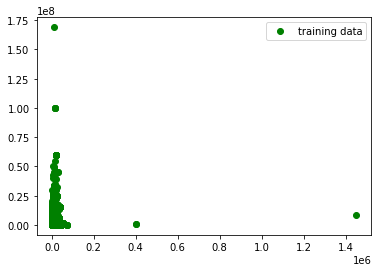

In [47]:
import matplotlib.pyplot as plt # for graphs 
X = data["house_size"]
y = data["price"]
TwoFeatureGraph(X,y)

In [48]:
data = data[(data["price"] < 800000) & (data["house_size"] < 5000)]

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303877 entries, 0 to 813142
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       303877 non-null  float64
 1   bed         303877 non-null  float64
 2   bath        303877 non-null  float64
 3   acre_lot    303877 non-null  float64
 4   house_size  303877 non-null  float64
 5   cityEnc     303877 non-null  int64  
 6   stateEnc    303877 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 18.5 MB


In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
X = data.drop(["price"],axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('Root Mean Squared Error (Train set):',rmse)

Root Mean Squared Error (Train set): 18683.870774132683


In [51]:
knn_model.score(X_train,y_train)

0.9899764999249503

In [52]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print('Root Mean Squared Error (Test set):',rmse)

Root Mean Squared Error (Test set): 39428.93479899345


In [53]:
knn_model.score(X_test,y_test)

0.9554537513261162